In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization (Static)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization (Interactive)
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Import Data 

In [3]:
# 1) All variables and countries from the master data
final_df_long= pd.read_csv("https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/master_data_long.csv")

# 2) Clusters list from Leo
clusters_list = pd.read_csv('https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/clusters_list.csv')

In [4]:
final_df_long = final_df_long.drop(columns=['Unnamed: 0'], errors='ignore')

# Cluster variations across time 

### Pre-processing 

In [5]:
# I will take 5-year averages (from 1991 to 1995, and 2020 to 2024)
# Only use years from 2015 to 2021
final_df_long['Year'] = final_df_long['Year'].astype(int)
df_start_end = final_df_long[final_df_long['Year'].isin([1991, 1992, 1993, 1994, 1995, 2020, 2021, 2022, 2023, 2024])].copy()

# Pivot the data to wide format
data_pivot_var = df_start_end.pivot_table(
    index=['Country Code', 'Variable'], 
    columns='Year', 
    values='Value'
)

# Take 5-year averages
years_91_95 = [1991, 1992, 1993, 1994, 1995]
years_20_24 = [2020, 2021, 2022, 2023, 2024]

data_pivot_var['avg_1991_1995'] = data_pivot_var[years_91_95].mean(axis=1)
data_pivot_var['avg_2020_2024'] = data_pivot_var[years_20_24].mean(axis=1)

# Calculate absolute change between 5-year averages
df_change = (data_pivot_var['avg_2020_2024'] - data_pivot_var['avg_1991_1995']).reset_index()
df_change.columns = ['Country Code', 'Variable', 'Net_Change'] 

# To wide format
df_change_wide = df_change.pivot(
    index='Country Code', 
    columns='Variable', 
    values='Net_Change'
)

# Merge with clusters_list from first cluster 
df_change_clusters = df_change_wide.merge(
    clusters_list,
    how='right',
    on='Country Code'
)

In [7]:
data_pivot_var

Year                                                        1991  \
Country Code Variable                                              
ABW          Agriculture                                     NaN   
             GDP per capita (constant prices, PPP)  34292.324000   
             Government revenue                              NaN   
             High-tech exports                               NaN   
             Industry                                        NaN   
...                                                          ...   
ZWE          NY.GDP.MINR.RT.ZS                          6.556822   
             NY.GDP.NGAS.RT.ZS                          0.000000   
             NY.GDP.PETR.RT.ZS                          0.000000   
             NY.GDP.TOTL.RT.ZS                          9.664192   
             Services                                  41.984275   

Year                                                        1992  \
Country Code Variable                                              
ABW          Agriculture                                     NaN   
             GDP per capita (constant prices, PPP)  35073.111000   
             Government revenue                              NaN   
             High-tech exports                               NaN   
             Industry                                        NaN   
...                                                          ...   
ZWE          NY.GDP.MINR.RT.ZS                          7.009879   
             NY.GDP.NGAS.RT.ZS                          0.000000   
             NY.GDP.PETR.RT.ZS                          0.000000   
             NY.GDP.TOTL.RT.ZS                         10.816818   
             Services                                  47.103981   

Year                                                        1993  \
Country Code Variable                                              
ABW          Agriculture                                     NaN   
             GDP per capita (constant prices, PPP)  35244.590000   
             Government revenue                              NaN   
             High-tech exports                               NaN   
             Industry                                        NaN   
...                                                          ...   
ZWE          NY.GDP.MINR.RT.ZS                          5.660610   
             NY.GDP.NGAS.RT.ZS                          0.000000   
             NY.GDP.PETR.RT.ZS                          0.000000   
             NY.GDP.TOTL.RT.ZS                          8.724395   
             Services                                  47.148134   

Year                                                        1994  \
Country Code Variable                                              
ABW          Agriculture                                     NaN   
             GDP per capita (constant prices, PPP)  36215.205000   
             Government revenue                              NaN   
             High-tech exports                               NaN   
             Industry                                        NaN   
...                                                          ...   
ZWE          NY.GDP.MINR.RT.ZS                          5.961453   
             NY.GDP.NGAS.RT.ZS                          0.000000   
             NY.GDP.PETR.RT.ZS                          0.000000   
             NY.GDP.TOTL.RT.ZS                          9.487028   
             Services                                  43.788172   

Year                                                        1995  \
Country Code Variable                                              
ABW          Agriculture                                0.505922   
             GDP per capita (constant prices, PPP)  36094.061000   
             Government revenue                        25.498000   
             High-tech exports                               NaN   
             Industry                               

#### NA check

In [202]:
df_change_clusters.shape # 136 countries

(136, 15)

In [ ]:
df_change_clusters.isna().sum() # Really bad.

# Economic Complexity and GDP

Country Code                               0
Agriculture                               12
Economic Complexity Index                  4
GDP per capita (constant prices, PPP)      5
Government revenue                        35
High-tech exports                        136
Industry                                  14
Manufacturing                             27
NY.GDP.MINR.RT.ZS                          4
NY.GDP.NGAS.RT.ZS                          4
NY.GDP.PETR.RT.ZS                          4
NY.GDP.TOTL.RT.ZS                          4
Services                                  16
Country Name                               0
cluster_6                                  0
dtype: int64

In [204]:
# Keep only clusters 1, 2 and 4
df_change_clusters = df_change_clusters[df_change_clusters['cluster_6'].isin([1, 2, 4])]

# Keeping only important variables
df_change_clusters = df_change_clusters[['Country Code', 'Country Name','Economic Complexity Index', 'Agriculture', 'Services','Industry', 'Manufacturing']]

df_change_clusters = df_change_clusters.dropna()


df_change_clusters_clean = df_change_clusters .set_index(['Country Code','Country Name'])


print(f"Data ready for scaling. Shape: {df_change_clusters_clean.shape}")


# Dropping NAs
#data_wide_imputed_var = df_change_clusters.dropna()

df_change_clusters_clean

Data ready for scaling. Shape: (16, 5)


,,Economic Complexity Index,Agriculture,Services,Industry,Manufacturing
Country Code,Country Name,,,,,
AUS,Australia,-1.01950,-0.806678,2.692442,-0.522385,-7.397251
AZE,Azerbaijan,-0.66700,-22.619437,3.851092,15.687440,-10.491238
BFA,Burkina Faso,0.04825,-13.274970,-0.221139,9.184356,-3.637790
CHL,Chile,-0.42575,-4.481012,8.195661,-5.979729,-9.915106
COG,Congo,-0.67200,-1.727771,-6.525870,2.848114,4.711570
COD,Congo Dem. Rep.,-0.54575,-38.104626,6.650000,29.083510,17.941530
GIN,Guinea,-0.29200,15.705594,2.269880,7.888702,8.314643
IRN,Iran,0.72250,1.114991,-3.006403,-1.023469,5.150362
IRQ,Iraq,-0.30900,-14.751802,16.822042,-3.314839,0.561905


## K-elbow

In [205]:

#Scale the data
scaler_filtered = StandardScaler()
countries_scaled_filtered_df = pd.DataFrame(
    scaler_filtered.fit_transform(df_change_clusters_clean),
    columns=['Economic Complexity', 'Agriculture', 'Industry','Services','Manufacturing'], 
    index=df_change_clusters_clean.index
)



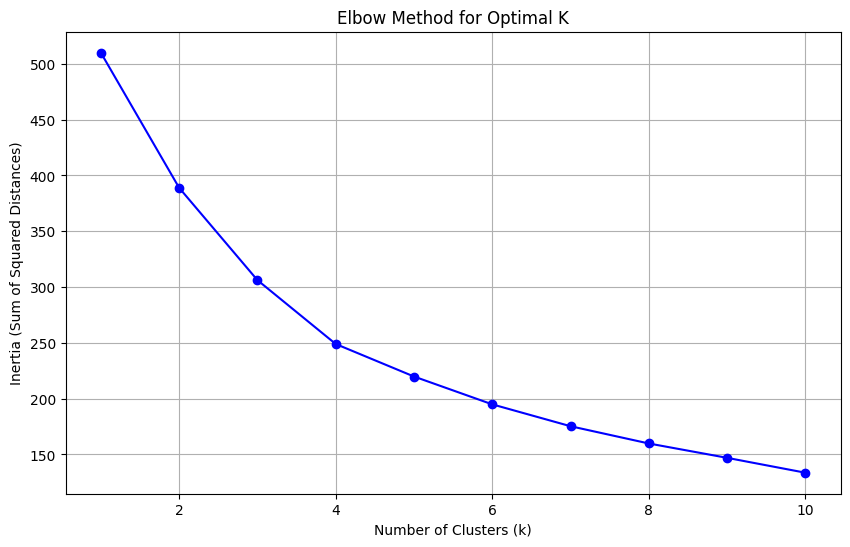

In [193]:
#Do the k-elbow plot
inertia = []
K_range = range(1, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20) 
    kmeans.fit(countries_scaled_filtered_df)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-') 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

## Clustering Variation

PCA Loadings (Influence of each variable on the axes):
                          PC1       PC2
Economic Complexity  0.338211  0.272046
Agriculture          0.070672  0.736952
Industry            -0.470157 -0.364891
Services             0.461548 -0.479264
Manufacturing        0.556836 -0.122644
cluster_3            0.369429 -0.070787


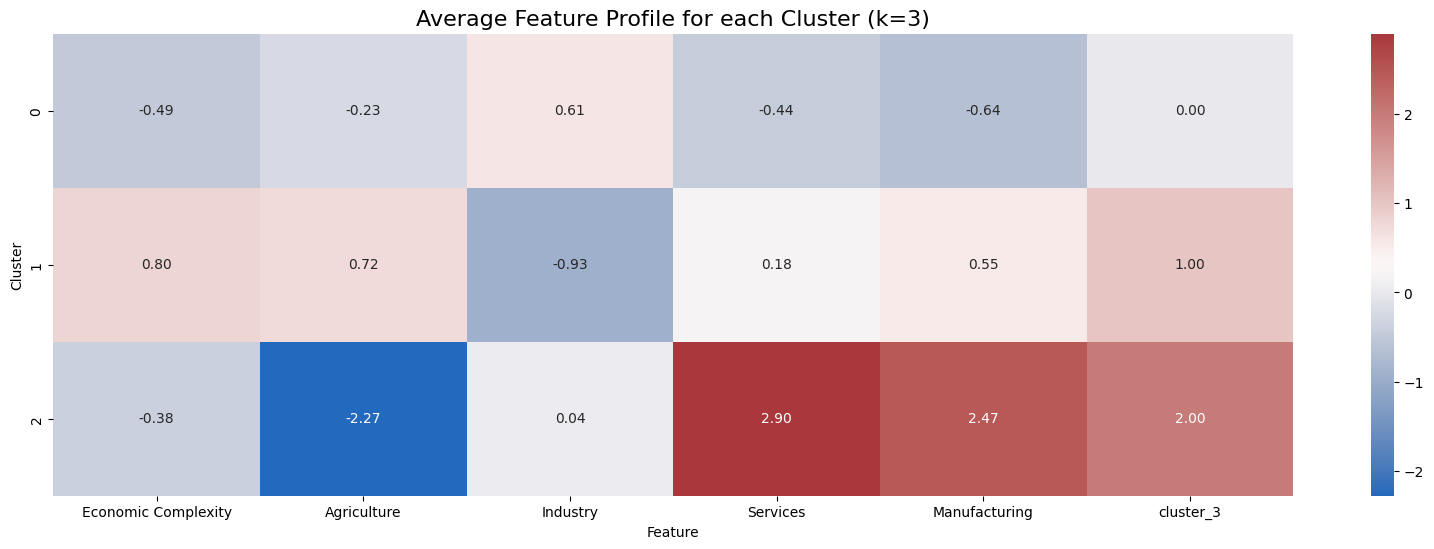

In [207]:
#Fit the k=6 model
k_country_3_filtered_var = KMeans(n_clusters=3, random_state=0, n_init=100)
k_country_3_filtered_var.fit(countries_scaled_filtered_df) 

#PCA and Visualization (as before)
data_for_pca_var = countries_scaled_filtered_df
countries_scaled_filtered_df['cluster_3'] = k_country_3_filtered_var.labels_
pca = PCA(n_components=2)
pca_components_var = pca.fit_transform(data_for_pca_var)
pca_df_var = pd.DataFrame(
    data=pca_components_var, 
    columns=['PC1', 'PC2'], 
    index=data_for_pca_var.index
)

# Add the labels from your main df
pca_df_var['cluster_3'] = countries_scaled_filtered_df['cluster_3']

# Extract Loadings 
loadings_var = pd.DataFrame(
    pca.components_.T,  
    columns=['PC1', 'PC2'],
    index=data_for_pca_var.columns  
)
print("PCA Loadings (Influence of each variable on the axes):")
print(loadings_var)

centroids_k3_var = k_country_3_filtered_var.cluster_centers_
centroid_df_k3_var = pd.DataFrame(
    centroids_k3_var, 
    columns=data_for_pca_var.columns 
)
pca_df_var['Country Code'] = pca_df_var.index 

plt.figure(figsize=(20, 6)) 
sns.heatmap(
    centroid_df_k3_var, 
    annot=True, 
    cmap='vlag', 
    fmt='.2f'
)
plt.title('Average Feature Profile for each Cluster (k=3)', fontsize=16)
plt.ylabel('Cluster')
plt.xlabel('Feature')
plt.show()

In [208]:
#Prepare DataFrame for Categorical Plotting
map_df_var = pca_df_var.copy().drop(columns='Country Code')
map_df_var['cluster_3'] = map_df_var['cluster_3'].astype(str)

map_df_var = map_df_var.reset_index()


#Create the k=6 Choropleth Map 
fig_map_3_var = px.choropleth(
    map_df_var,
    locations="Country Code",
    color="cluster_3",
    hover_name='Country Name',
    hover_data=["cluster_3"],
    title="Clustering by change in economic outcomes and natural resource use (k=3, 2014-2021)", 
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig_map_3_var.update_geos(
    projection_type="natural earth",
    showcountries=True,
    showcoastlines=True
)

fig_map_3_var.show()